In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
plt.style.use('ggplot')

In [3]:
folder_resultados = "/content/drive/MyDrive/experimentos de tesis/resultados/"
folder_datasets_originales = "/content/drive/MyDrive/experimentos de tesis/datasets originales/"

In [4]:
# promedio de resultados de clasificadores clásicos
ba_clasicos = pd.read_csv(folder_resultados+"ba_clasificadores_clasicos.csv")
datasets_names = ba_clasicos['Indices'].str.split('_').apply(lambda x: x[0])
ba_clasicos["Dataset Name"] = datasets_names
ba_clasicos.drop('Indices', axis=1, inplace=True)
ba_clasicos.groupby('Dataset Name').mean().mean()

3-NN            0.760106
5-NN            0.731837
NaiveBayes      0.739157
MLP             0.682508
RandomForest    0.753182
AdaBoost        0.597204
DecisionTree    0.654963
SVM-Linear      0.824524
dtype: float64

In [5]:
# Se cargan los resultados de la metodología propuesta

prop1_todos100 = pd.read_csv(folder_resultados+"cnn_todos_100_prop1.csv")

prop1_filtros90 = pd.read_csv(folder_resultados+"cnn_filtros_90_prop1.csv", index_col="Indices")
prop1_clasif90 = pd.read_csv(folder_resultados+"cnn_clasif_90_prop1.csv", index_col="Indices")
prop1_todos90 = pd.concat((prop1_filtros90, prop1_clasif90), axis=1)
prop1_todos90 = prop1_todos90.reset_index()

prop1_filtros80 = pd.read_csv(folder_resultados+"cnn_filtros_80_prop1.csv", index_col="Indices")
prop1_clasif80 = pd.read_csv(folder_resultados+"cnn_clasif_80_prop1.csv", index_col="Indices")
prop1_todos80 = pd.concat((prop1_filtros80, prop1_clasif80), axis=1)
prop1_todos80 = prop1_todos80.reset_index()

prop1_filtros70 = pd.read_csv(folder_resultados+"cnn_filtros_70_prop1.csv", index_col="Indices")
prop1_clasif70 = pd.read_csv(folder_resultados+"cnn_clasif_70_prop1.csv", index_col="Indices")
prop1_todos70 = pd.concat((prop1_filtros70, prop1_clasif70), axis=1)
prop1_todos70 = prop1_todos70.reset_index()

In [6]:
# Resultados propmedio de propuestas completas (sin recorte)
datasets_names = prop1_todos100['Indices'].str.split('_').apply(lambda x: x[0])
prop1_todos100["Dataset Name"] = datasets_names
prop1_todos100.drop('Indices', axis=1, inplace=True)
prop1_todos100.groupby('Dataset Name').mean().mean()

_chi2/1           0.776840
_f_classif/1      0.772979
_mutual_info/1    0.779639
_3nn/1            0.792664
_5nn/1            0.796211
_nb/1             0.797296
dtype: float64

In [7]:
# Resultaods promedio de propuestas con recorte (30%)
datasets_names = prop1_todos70['Indices'].str.split('_').apply(lambda x: x[0])
prop1_todos70["Dataset Name"] = datasets_names
prop1_todos70.drop('Indices', axis=1, inplace=True)
prop1_todos70.groupby('Dataset Name').mean().mean()

_chi2/0.7           0.827784
_f_classif/0.7      0.816283
_mutual_info/0.7    0.808138
_3nn/0.7            0.748477
_5nn/0.7            0.766094
_nb/0.7             0.759523
dtype: float64

In [8]:
filenames = ['9tumors.csv', '11tumors.csv', '14tumors.csv', 'braintumor1.csv', 'braintumor2.csv',
             'dlbcl.csv', 'leukemia1.csv', 'leukemia2.csv', 'lungcancer.csv', 'prostate.csv', 'srbct.csv']

In [11]:
# Todas las propuestas
todos100 = prop1_todos100.mean(numeric_only=True).sort_values(ascending=False)
todos90 = prop1_todos90.mean(numeric_only=True).sort_values(ascending=False)
todos80 = prop1_todos80.mean(numeric_only=True).sort_values(ascending=False)
todos70 = prop1_todos70.mean(numeric_only=True).sort_values(ascending=False)
print(todos100)
print(todos90)
print(todos80)
print(todos70)

_nb/1             0.797296
_5nn/1            0.796211
_3nn/1            0.792664
_mutual_info/1    0.779639
_chi2/1           0.776840
_f_classif/1      0.772979
dtype: float64
_chi2/0.9           0.813788
_f_classif/0.9      0.800008
_nb/0.9             0.791729
_3nn/0.9            0.789001
_5nn/0.9            0.788803
_mutual_info/0.9    0.778705
dtype: float64
_chi2/0.8           0.821987
_mutual_info/0.8    0.812110
_f_classif/0.8      0.806875
_3nn/0.8            0.778756
_5nn/0.8            0.774398
_nb/0.8             0.770538
dtype: float64
_chi2/0.7           0.827784
_f_classif/0.7      0.816283
_mutual_info/0.7    0.808138
_5nn/0.7            0.766094
_nb/0.7             0.759523
_3nn/0.7            0.748477
dtype: float64


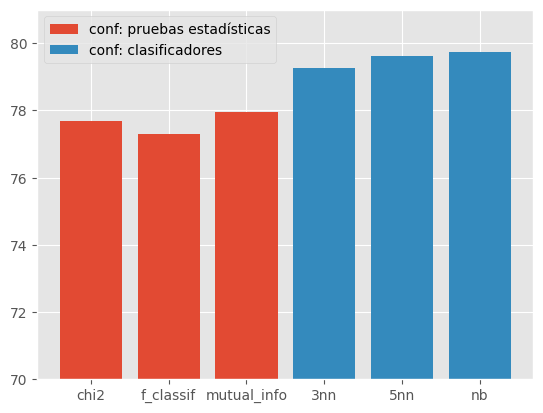

In [46]:
# Resultados por recortes en datasets (SR)
x = np.array(todos100.index.str[1:-2])
x = x[[4,5,3,2,1,0]]
y = np.array(todos100) * 100
y = y[[4,5,3,2,1,0]]
plt.bar(x[:3], y[:3], label="conf: pruebas estadísticas")
plt.bar(x[3:], y[3:], label="conf: clasificadores")
plt.legend()
plt.ylim([70,81])
plt.show()

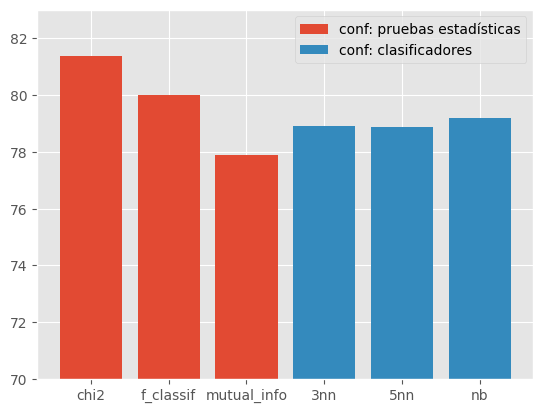

In [51]:
# Resultados por recortes en datasets (10%)
x = np.array(todos90.index.str[1:-4])
x = x[[0,1,5,3,4,2]]
y = np.array(todos90) * 100
y = y[[0,1,5,3,4,2]]
plt.bar(x[:3], y[:3], label="conf: pruebas estadísticas")
plt.bar(x[3:], y[3:], label="conf: clasificadores")
plt.legend()
plt.ylim([70,83])
plt.show()

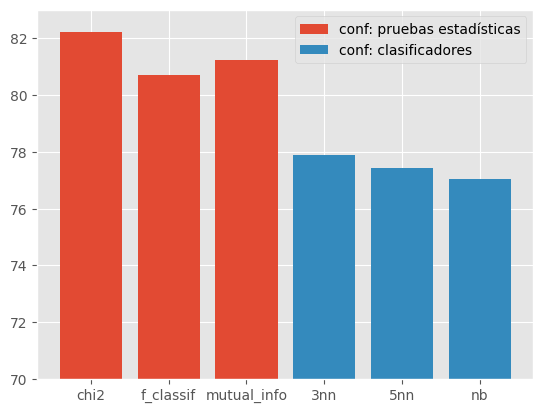

In [53]:
# Resultados por recorte en datasets (20%)
x = np.array(todos80.index.str[1:-4])
x = x[[0,2,1,3,4,5]]
y = np.array(todos80) * 100
y = y[[0,2,1,3,4,5]]
plt.bar(x[:3], y[:3], label="conf: pruebas estadísticas")
plt.bar(x[3:], y[3:], label="conf: clasificadores")
plt.legend()
plt.ylim([70,83])
plt.show()

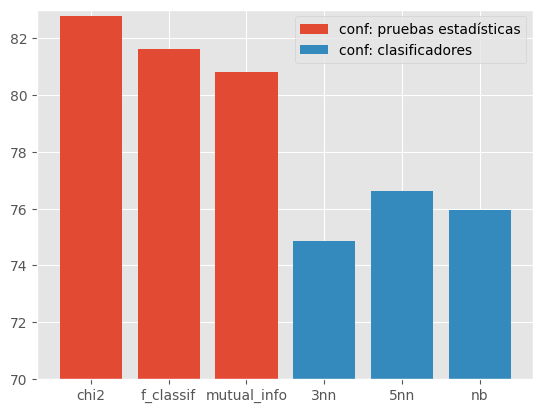

In [58]:
# Resultados por recortes en datasets (30%)
x = np.array(todos70.index.str[1:-4])
x = x[[0,1,2,5,3,4]]
y = np.array(todos70) * 100
y = y[[0,1,2,5,3,4]]
plt.bar(x[:3], y[:3], label="conf: pruebas estadísticas")
plt.bar(x[3:], y[3:], label="conf: clasificadores")
plt.legend()
plt.ylim([70,83])
plt.show()

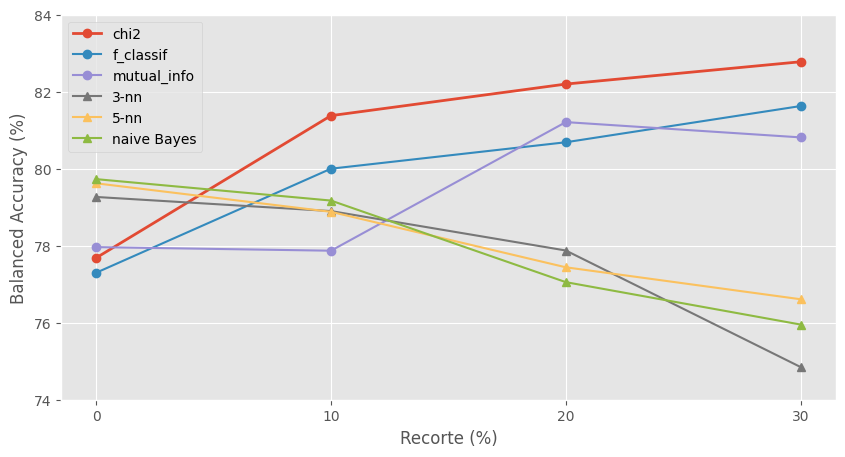

In [22]:
# Gráfica de resultados al aplicar recortes en datasets
plt.figure(figsize=(10,5))
chi2 = np.array([todos100['_chi2/1'], todos90['_chi2/0.9'], todos80['_chi2/0.8'], todos70['_chi2/0.7']])*100
f_clas = np.array([todos100['_f_classif/1'], todos90['_f_classif/0.9'], todos80['_f_classif/0.8'], todos70['_f_classif/0.7']])*100
mutual_info = np.array([todos100['_mutual_info/1'], todos90['_mutual_info/0.9'], todos80['_mutual_info/0.8'], todos70['_mutual_info/0.7']])*100
knn_3 = np.array([todos100['_3nn/1'], todos90['_3nn/0.9'], todos80['_3nn/0.8'], todos70['_3nn/0.7']])*100
knn_5 = np.array([todos100['_5nn/1'], todos90['_5nn/0.9'], todos80['_5nn/0.8'], todos70['_5nn/0.7']])*100
nb = np.array([todos100['_nb/1'], todos90['_nb/0.9'], todos80['_nb/0.8'], todos70['_nb/0.7']])*100
pos = ["0", "10", "20", "30"]
plt.plot(pos, chi2, label="chi2", linewidth=2, marker='o')
plt.plot(pos, f_clas, label="f_classif", marker='o')
plt.plot(pos, mutual_info, label="mutual_info", marker='o')
plt.plot(pos, knn_3, label="3-nn", marker='^')
plt.plot(pos, knn_5, label="5-nn", marker='^')
plt.plot(pos, nb, label="naive Bayes", marker='^')
plt.ylim([74,84])
plt.legend()
plt.xlabel("Recorte (%)")
plt.ylabel("Balanced Accuracy (%)")
plt.show()

In [59]:
resultados100 = prop1_todos100.iloc[:,:-1]
resultados70 = prop1_todos70.iloc[:,:-1]

new_cols = list(map(lambda col: col.replace('0.7', '30%'), resultados70.columns))
resultados70.columns = new_cols

new_colsSR = list(map(lambda col: col.replace('1', 'SR'), resultados100.columns))
resultados100.columns = new_colsSR

In [60]:
resultadosclasicos = pd.read_csv(folder_resultados+"ba_clasificadores_clasicos.csv").iloc[:,:-1]

In [61]:
resultadosclasicos

,3-NN,5-NN,NaiveBayes,MLP,RandomForest,AdaBoost,DecisionTree,SVM-Linear
0,0.380952,0.380952,0.285714,0.428571,0.142857,0.000000,0.166667,0.428571
1,0.428571,0.357143,0.428571,0.500000,0.285714,0.214286,0.142857,0.500000
2,0.222222,0.444444,0.388889,0.277778,0.444444,0.166667,0.277778,0.555556
3,0.738095,0.523810,0.619048,0.452381,0.666667,0.380952,0.404762,0.690476
4,0.214286,0.166667,0.285714,0.285714,0.214286,0.142857,0.333333,0.523810
...,...,...,...,...,...,...,...,...
215,0.928571,0.892857,1.000000,1.000000,1.000000,0.628571,0.566071,1.000000
216,1.000000,1.000000,0.972222,1.000000,1.000000,0.875000,0.659722,1.000000
217,0.906250,0.875000,1.000000,1.000000,1.000000,0.822917,0.739583,1.000000
218,0.944444,0.907407,1.000000,1.000000,1.000000,0.888889,0.888889,1.000000


In [62]:
print(f"dim resultados100: {resultados100.shape}")
print(f"dim resultados70: {resultados70.shape}")
print(f"dim resultadosclasicos: {resultadosclasicos.shape}")

dim resultados100: (220, 6)
dim resultados70: (220, 6)
dim resultadosclasicos: (220, 8)


In [63]:
tablaresultados = pd.concat([resultados100, resultados70, resultadosclasicos], axis=1)
tablaresultados.shape

(220, 20)

In [64]:
tablaresultados

,_chi2/SR,_f_classif/SR,_mutual_info/SR,_3nn/SR,_5nn/SR,_nb/SR,_chi2/30%,_f_classif/30%,_mutual_info/30%,_3nn/30%,_5nn/30%,_nb/30%,3-NN,5-NN,NaiveBayes,MLP,RandomForest,AdaBoost,DecisionTree,SVM-Linear
0,0.476190,0.428571,0.476190,0.523810,0.619048,0.476190,0.571429,0.666667,0.619048,0.571429,0.571429,0.523810,0.380952,0.380952,0.285714,0.428571,0.142857,0.000000,0.166667,0.428571
1,0.500000,0.428571,0.500000,0.571429,0.428571,0.642857,0.642857,0.714286,0.785714,0.571429,0.428571,0.571429,0.428571,0.357143,0.428571,0.500000,0.285714,0.214286,0.142857,0.500000
2,0.611111,0.555556,0.722222,0.666667,0.777778,0.611111,0.888889,0.833333,0.722222,0.666667,0.555556,0.611111,0.222222,0.444444,0.388889,0.277778,0.444444,0.166667,0.277778,0.555556
3,0.714286,0.809524,0.571429,0.595238,0.857143,0.857143,0.952381,0.904762,0.880952,0.785714,0.857143,0.880952,0.738095,0.523810,0.619048,0.452381,0.666667,0.380952,0.404762,0.690476
4,0.428571,0.500000,0.523810,0.500000,0.428571,0.428571,0.571429,0.857143,0.619048,0.428571,0.571429,0.571429,0.214286,0.166667,0.285714,0.285714,0.214286,0.142857,0.333333,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.964286,0.964286,0.900000,1.000000,1.000000,1.000000,1.000000,0.964286,0.750000,1.000000,0.950000,0.950000,0.928571,0.892857,1.000000,1.000000,1.000000,0.628571,0.566071,1.000000
216,0.944444,1.000000,1.000000,1.000000,0.972222,1.000000,1.000000,1.000000,1.000000,0.972222,0.972222,0.972222,1.000000,1.000000,0.972222,1.000000,1.000000,0.875000,0.659722,1.000000
217,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,1.000000,1.000000,0.937500,1.000000,0.916667,0.906250,0.875000,1.000000,1.000000,1.000000,0.822917,0.739583,1.000000
218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.944444,0.907407,1.000000,1.000000,1.000000,0.888889,0.888889,1.000000


In [65]:
from textwrap import indent
def ranking(tabla_experimentos):
  """
  Aplica una prueba estadística Friedman a los resultados de los esperimentos
  que arroja un ranking de los clasificadores y el valor p, para conocer si exiten diferencias
  en las distribuciones de los resultados de los clasificadores
  tabla_experimentos: una talba que muestra los resultaods de los experimentos donde
  filas represetan las muestras y las columnas los clasificadores

  return: None
  """
  tabla_experimentos.columns = ["cnn"+ c if c[0] == "_" else c for c in tabla_experimentos.columns]
  accs_df = tabla_experimentos
  accs_arr = accs_df.values
  accs_arr = 1 - accs_arr
  # print(f"Accuracys:\n{accs_df.values.round(2)}")
  # prueba de Friedman
  statistics, pvalue = st.friedmanchisquare(accs_arr[:,0],accs_arr[:,1],accs_arr[:,2],accs_arr[:,3],accs_arr[:,4],
                                          accs_arr[:,5],accs_arr[:,6],accs_arr[:,7],accs_arr[:,8],accs_arr[:,9],
                                          accs_arr[:,10],accs_arr[:,11],accs_arr[:,12],accs_arr[:,13],accs_arr[:,14],
                                          accs_arr[:,15],accs_arr[:,16],accs_arr[:,17],accs_arr[:,18],accs_arr[:,19])
  print(f"\np-value: {pvalue}")

  # Rankeo de algoritmos
  rank = st.mstats.rankdata(accs_arr, axis=1)
  # Promedio del ranking
  mrank = np.average(rank, axis=0)
  # Ordenar clasificadores por ranking
  rank_idx = np.argsort(mrank)
  mrank_sorted = mrank[rank_idx]
  clfs_sorted = accs_df.columns[rank_idx]

  # print(f"Tabla de rankings en algoritmos:\n{rank}")
  print("\nClasificador                Ranking")
  for avg, clf in zip(mrank_sorted, clfs_sorted):
      # clf = clf.split("(")[0]
      print(f"{clf}:{' '*(28-len(clf))}{avg.round(2)}")
  ind = 0
  c = 0
  nbox = 0
  boxclas = []
  colsrank = list(accs_df.columns[rank_idx])
  while c < 12:
    if colsrank[ind][:3] == "cnn":
      c +=1
    else:
      boxclas.append(ind)
    nbox +=1
    ind +=1

  fig = plt.figure(figsize=(20,8),dpi=100)
  # demonstrate how to customize the display different elements:
  boxprops = dict(linestyle='-', linewidth=2, color='k')
  medianprops = dict(linestyle='-', linewidth=2, color='k')

  ax = accs_df.boxplot(column=list(accs_df.columns[rank_idx])[:nbox],
                  # by=df.index.get_level_values('datetime').year,
                  showfliers=True, showmeans=True,
                  boxprops=boxprops,
                  medianprops=medianprops,
                  fontsize=10,
                  meanprops=dict(color="k"),
                  patch_artist=True,
                  return_type='dict')
  # get rid of the automatic title

  colors = ['lightsteelblue']*14
  for box, i in zip(ax["boxes"], range(len(colors))):
      box.set_facecolor(colors[i])
  for bc in boxclas:
    ax["boxes"][bc].set_facecolor("antiquewhite")

  plt.xticks(fontweight='bold', rotation=20)


  plt.suptitle("")
  # plt.title("Configuraciones clasificadas con CNN vs Mejores Clasificadores")
  plt.show()
  fig.savefig('boxplot.png')



p-value: 1.8017332549682782e-146

Clasificador                Ranking
cnn_chi2/30%:                7.16
SVM-Linear:                  7.63
cnn_f_classif/30%:           7.89
cnn_mutual_info/30%:         8.18
cnn_nb/SR:                   8.72
cnn_3nn/SR:                  8.97
cnn_5nn/SR:                  9.0
cnn_mutual_info/SR:          9.56
cnn_chi2/SR:                 9.89
cnn_f_classif/SR:            10.14
cnn_5nn/30%:                 10.28
cnn_3nn/30%:                 10.57
cnn_nb/30%:                  10.72
RandomForest:                10.78
NaiveBayes:                  11.53
3-NN:                        11.71
MLP:                         12.98
5-NN:                        13.27
DecisionTree:                15.21
AdaBoost:                    15.79


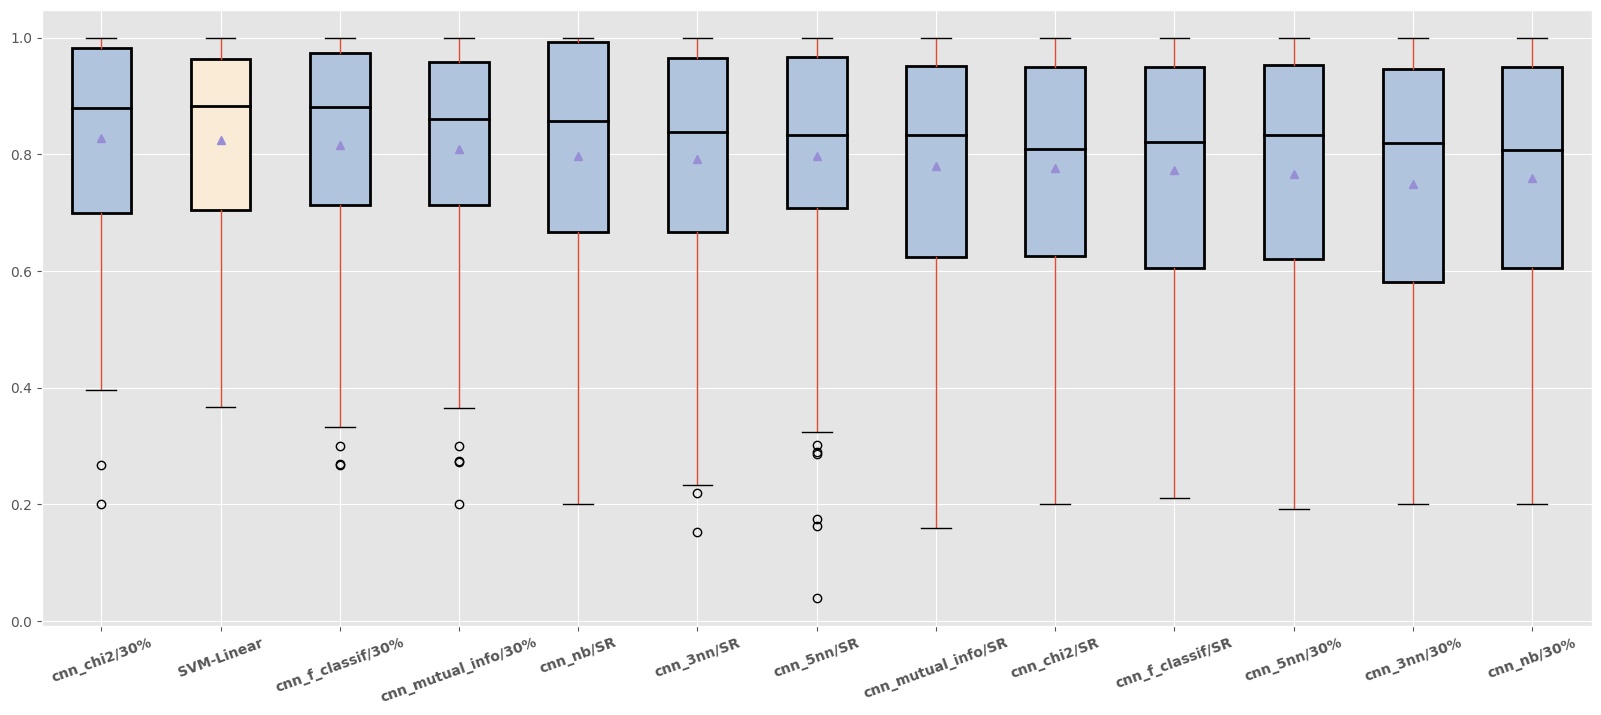

In [66]:
ranking(tablaresultados)